In [1]:
import numpy as np
import os
from PIL import Image
os.chdir('/sdcard/1/img')

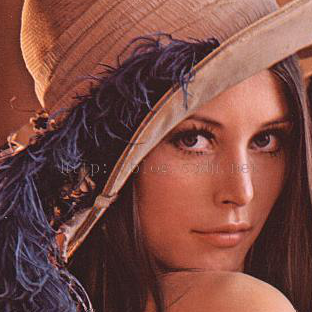

In [2]:
im = Image.open('crop.png')
w, h = im.size
im

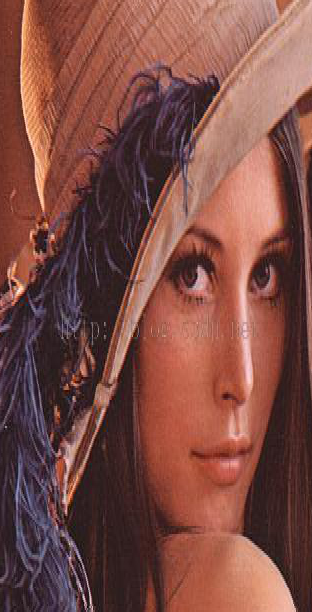

In [3]:
im.resize((w, h+300))

# 旋转

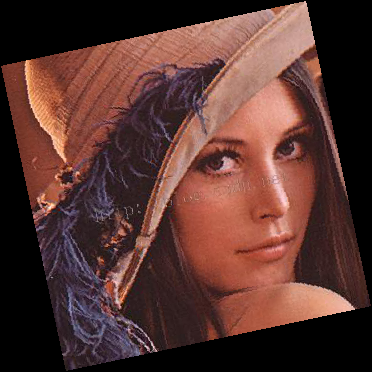

In [9]:
im.rotate(12, expand=True)

# 镜像翻转

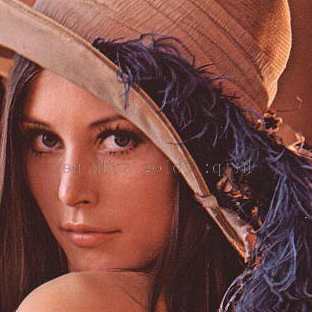

In [10]:
im.transpose(Image.FLIP_LEFT_RIGHT)

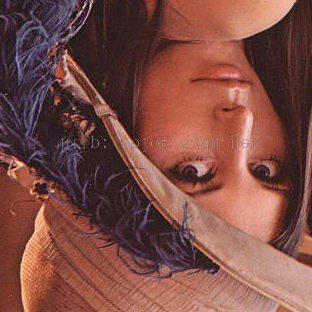

In [11]:
im.transpose(Image.FLIP_TOP_BOTTOM)

# 更改单个像素

In [13]:
im1 = Image.new('RGBA', (100, 100))
im1.getpixel((0, 0))

(0, 0, 0, 0)

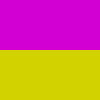

In [25]:
for x in range(100):
    for y in range(50):
        im1.putpixel((x, y), (210, 0, 210))
    for y in range(50, 100):
        im1.putpixel((x, y), (210, 210, 0))
im1

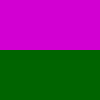

In [21]:
from PIL import ImageColor
for x in range(100):
    for y in range(50, 100):
        im1.putpixel((x, y), ImageColor.getcolor('darkgreen', 'RGBA'))
im1

In [26]:
im1.save('putPixel.png')
im1.getpixel((0, 0))

(210, 0, 210, 255)

# 添加徽标

In [57]:
from PIL import Image
import os
os.chdir('/sdcard/1/img')
os.makedirs('withLogo', exist_ok= True)

LOGO_NAME = 'catlogo.jpg'
FIT_SIZE = 1000
logoIm = Image.open(LOGO_NAME)
logoIm = logoIm.resize((300, 300))
logoWidth, logoHeight = logoIm.size

In [60]:
for filename in os.listdir('.'):
    if not (filename.endswith('.png') or filename.endswith('.jpg')) or \
      filename == LOGO_NAME:
            continue
    im = Image.open(filename)
    w, h = im.size
    if w>FIT_SIZE and h>FIT_SIZE:
        if w>h:
            h = int(FIT_SIZE/w*h)
            w = FIT_SIZE
        else:
            w = int(FIT_SIZE/h*w)
            h = FIT_SIZE
    im = im.resize((w, h))
    im.paste(logoIm, (w-logoWidth, h-logoHeight))
    im.save(os.path.join('withLogo', filename))

KeyboardInterrupt: 

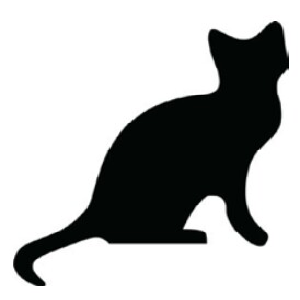

In [14]:
logoIm

# 照片墙

In [ ]:
base = Image.new('RGB', (3000, 1200), 'purple')
imList = []
for r, d, f in os.walk('/sdcard/1/new_target'):
    for i in f:
        imfile = os.path.join(r, i)
        im = Image.open(imfile)
        im = im.resize((300, 300))
        imList.append(im)
W, H = base.size
w, h = im.size
n = 0
for i in range(0, W, w):
    for j in range(0, H, h):
        if n>len(imList)-1:
            break
        else:
            base.paste(imList[n], (i, j))
            n += 0
base.save('family.jpg')

In [7]:
from PIL import Image
import os
os.chdir('/sdcard/1/img')

In [8]:
def get_char(r, g, b, alpha=256):
    ascii_char = list("$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^`'. ")
    if alpha==0:
        return ' '
    length = len(ascii_char)
    gray = int(0.2126*r + 0.7152*g + 0.0722*b)
    unit = (256.0 + 1)/length
    return ascii_char[int(gray / unit)]

In [9]:
def draw(w, h):
    from PIL import Image
    im = Image.open('qq.jpg')
    im = im.resize((w, h), Image.NEAREST)
    txt = ' '
    for i in range(w):
        for j in range(h):
            txt += get_char(*im.getpixel((j, i)))
            txt += '\n'
    with open('qq.txt', 'w') as f:
        f.write(txt)
    print('ok')

In [10]:
draw(300, 300)

ok


# 图像绘画

In [3]:
from PIL import Image, ImageDraw

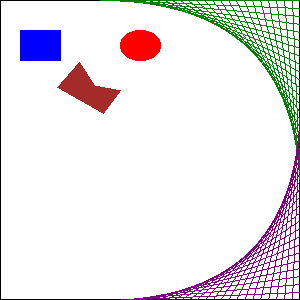

In [77]:
im = Image.new('RGBA', (300, 300), 'white')
draw = ImageDraw.Draw(im)
draw.line([(0, 0), (299,  0), (299, 299), (0, 299), (0, 0)], fill='black')
draw.rectangle((20, 30, 60, 60), fill='blue')
draw.ellipse((120, 30, 160, 60), fill='red')
draw.polygon(((57, 87), (79, 62), (94, 85), (120, 90), (103, 113)), fill='brown')
for i in range(100, 300, 8):
    draw.line([(i, 0), (300, i-100) ], fill='green')

for i in range(100, 300, 8):
    draw.line([(300, i), (400-i, 300)], fill='purple')
im

# 绘制文本

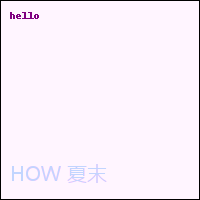

In [62]:
from PIL import Image, ImageDraw, ImageFont
import os
os.chdir('/sdcard/1/img')
im = Image.new('RGBA', (200, 200), (255, 0, 255, 10))
draw = ImageDraw.Draw(im)
draw.line([(0, 0), (199, 0), (199, 199), (0, 199), (0, 0)], fill='black')
draw.text((10, 10), 'hello', fill='purple')
arialFont = ImageFont.truetype(os.path.join('/sdcard/1/font', 'MSYH.ttf'), 20)
draw.text((10, 160), 'HOW 夏末' , fill=(100, 150, 255, 100), font=arialFont)
im

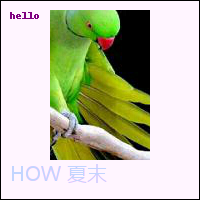

In [63]:
head = Image.open('bird.jpg')
#head = head.resize((100, 100), Image.ANTIALIAS)
head = head.crop((100, 50, 200, 200))
head = head.transpose(Image.FLIP_LEFT_RIGHT)
im.paste(head, (50, 10))
im

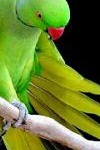

In [64]:
head

In [111]:
from PIL import Image, ImageDraw
import numpy as np

def drawLine():
    im =Image.new('RGBA', (500, 500), 'white')
    draw = ImageDraw.Draw(im)
    
    li = []
    for i in range(40):
        x = np.random.randint(500)
        y = np.random.randint(500)
        if len(li)>2:
            line = (np.random.choice(li[-1]), y)
        else:
            line = (x, y)
        li.append(line)
    #draw.line([(np.random.randint(500),  np.random.randint(500)), (60, 20)], fill=(np.random.randint(255), np.random.randint(255), np.random.randint(255)))
    draw.line(li, fill='black', width=6)
    return im

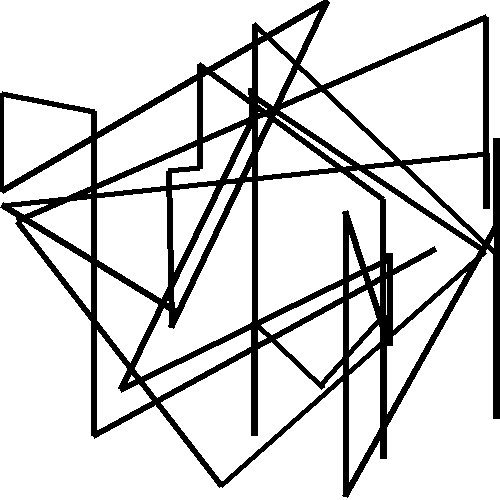

In [112]:
drawLine()

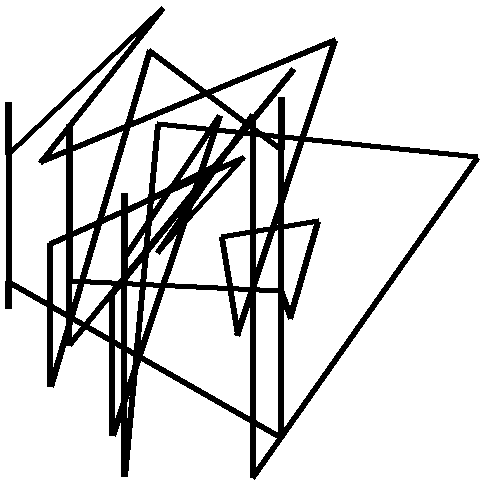

In [116]:
drawLine()

In [ ]:
r